In [87]:
import pandas as pd
import os
import matplotlib.pyplot as plt

reports_path = "../../generated/reports-no-bug"

data = []

users = os.listdir(reports_path)
for user in users:
    uploads_path = os.path.join(reports_path, user)
    uploads = os.listdir(uploads_path)
    for upload in uploads:
        path = os.path.join(uploads_path, upload)

        pitest_path = os.path.join(path, "Pitest", "mutations.xml")
        pitest_valid = os.path.exists(pitest_path)

        data.append([user, upload, pitest_path, pitest_valid])


main_df = pd.DataFrame(data, columns=['user', 'timestamp', 'pitest', 'pitest_valid'])
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'], format='%Y-%m-%dT%H-%M-%S.%fZ', utc=True).dt.tz_convert("Europe/Brussels")

# Add group

In [88]:
df_users = pd.read_csv('../../generated/database/users.csv', usecols=['user', 'group']).dropna()
main_df = main_df.merge(df_users, on=['user'], how='left')
main_df = main_df.drop(columns=['group_y'], errors='ignore')
main_df = main_df.rename(columns={'group_x': 'group'}, errors='ignore')
main_df

,user,timestamp,pitest,pitest_valid,group
0,0d271530-be17-4538-bf04-dde3c6069b5f,2025-04-17 09:25:49.752000+02:00,../../generated/reports-no-bug\0d271530-be17-4...,True,A
1,0d271530-be17-4538-bf04-dde3c6069b5f,2025-04-17 10:07:37.190000+02:00,../../generated/reports-no-bug\0d271530-be17-4...,True,A
2,11b1644a-d11f-45cb-8a40-282a209059c0,2025-04-17 09:26:18.184000+02:00,../../generated/reports-no-bug\11b1644a-d11f-4...,True,A
3,11b1644a-d11f-45cb-8a40-282a209059c0,2025-04-17 10:07:31.004000+02:00,../../generated/reports-no-bug\11b1644a-d11f-4...,True,A
4,1d20c70c-aa71-49ff-abf5-6013870a28f8,2025-04-17 09:46:46.781000+02:00,../../generated/reports-no-bug\1d20c70c-aa71-4...,False,A
5,1d20c70c-aa71-49ff-abf5-6013870a28f8,2025-04-17 10:06:49.533000+02:00,../../generated/reports-no-bug\1d20c70c-aa71-4...,False,A
6,1f06f352-91b6-4373-87ed-5a5070723efb,2025-04-17 09:26:06.551000+02:00,../../generated/reports-no-bug\1f06f352-91b6-4...,True,A
7,1f06f352-91b6-4373-87ed-5a5070723efb,2025-04-17 10:06:44.823000+02:00,../../generated/reports-no-bug\1f06f352-91b6-4...,False,A
8,223bf16c-aaad-404f-8a47-61f3ced741e4,2025-04-17 09:26:01.215000+02:00,../../generated/reports-no-bug\223bf16c-aaad-4...,True,A
9,223bf16c-aaad-404f-8a47-61f3ced741e4,2025-04-17 10:06:56.843000+02:00,../../generated/reports-no-bug\223bf16c-aaad-4...,True,A


# Invalid data

In [89]:
invalid_pitest = main_df[main_df["pitest_valid"] == False]

print(f"Nombre total de projets : {len(main_df)}")
print(f"Nombre de projets valides Pitest :", f"{len(main_df) - len(invalid_pitest)}/{len(main_df)}", f"({(len(main_df) - len(invalid_pitest)) / len(main_df) * 100:.2f}%)")
print(f"Nombre de projets invalides Pitest :", f"{len(invalid_pitest)}/{len(main_df)}", f"({len(invalid_pitest) / len(main_df) * 100:.2f}%)")
print(f"\t Groupe A : {len(invalid_pitest[invalid_pitest['group'] == 'A'])}")
print(f"\t Groupe B : {len(invalid_pitest[invalid_pitest['group'] == 'B'])}")

Nombre total de projets : 58
Nombre de projets valides Pitest : 41/58 (70.69%)
Nombre de projets invalides Pitest : 17/58 (29.31%)
	 Groupe A : 11
	 Groupe B : 6


# User both sessions Pitest valid

In [90]:
cols = ['instruction', 'branch', 'line', 'method']
users_count = len(main_df.groupby('user'))
users_with_timestamps = main_df[(main_df['pitest_valid'] == True)].groupby('user')['timestamp'].count().reset_index()
users_with_2_timestamps = users_with_timestamps[users_with_timestamps['timestamp'] == 2]['user']
users = main_df[main_df['user'].isin(users_with_2_timestamps)]

print(f"Nombre d'utilisateurs avec 2 rapports Pitest valides : {len(users_with_2_timestamps)}/{users_count}")
users

Nombre d'utilisateurs avec 2 rapports Pitest valides : 16/29


,user,timestamp,pitest,pitest_valid,group
0,0d271530-be17-4538-bf04-dde3c6069b5f,2025-04-17 09:25:49.752000+02:00,../../generated/reports-no-bug\0d271530-be17-4...,True,A
1,0d271530-be17-4538-bf04-dde3c6069b5f,2025-04-17 10:07:37.190000+02:00,../../generated/reports-no-bug\0d271530-be17-4...,True,A
2,11b1644a-d11f-45cb-8a40-282a209059c0,2025-04-17 09:26:18.184000+02:00,../../generated/reports-no-bug\11b1644a-d11f-4...,True,A
3,11b1644a-d11f-45cb-8a40-282a209059c0,2025-04-17 10:07:31.004000+02:00,../../generated/reports-no-bug\11b1644a-d11f-4...,True,A
8,223bf16c-aaad-404f-8a47-61f3ced741e4,2025-04-17 09:26:01.215000+02:00,../../generated/reports-no-bug\223bf16c-aaad-4...,True,A
9,223bf16c-aaad-404f-8a47-61f3ced741e4,2025-04-17 10:06:56.843000+02:00,../../generated/reports-no-bug\223bf16c-aaad-4...,True,A
10,2b2965f7-5d66-4569-802b-27c84aa69bff,2025-04-17 09:24:52.114000+02:00,../../generated/reports-no-bug\2b2965f7-5d66-4...,True,B
11,2b2965f7-5d66-4569-802b-27c84aa69bff,2025-04-17 10:05:03.689000+02:00,../../generated/reports-no-bug\2b2965f7-5d66-4...,True,B
18,60716858-6fcb-4953-88e3-12a51b3c7c47,2025-04-17 09:24:21.034000+02:00,../../generated/reports-no-bug\60716858-6fcb-4...,True,B
19,60716858-6fcb-4953-88e3-12a51b3c7c47,2025-04-17 10:05:22.289000+02:00,../../generated/reports-no-bug\60716858-6fcb-4...,True,B


In [115]:
users.loc[:, 'session'] = users.groupby('user')['timestamp'].transform(lambda x: pd.factorize(x)[0] + 1)
users

,user,timestamp,pitest,pitest_valid,group,session
0,0d271530-be17-4538-bf04-dde3c6069b5f,2025-04-17 09:25:49.752000+02:00,../../generated/reports-no-bug\0d271530-be17-4...,True,A,1
1,0d271530-be17-4538-bf04-dde3c6069b5f,2025-04-17 10:07:37.190000+02:00,../../generated/reports-no-bug\0d271530-be17-4...,True,A,2
2,11b1644a-d11f-45cb-8a40-282a209059c0,2025-04-17 09:26:18.184000+02:00,../../generated/reports-no-bug\11b1644a-d11f-4...,True,A,1
3,11b1644a-d11f-45cb-8a40-282a209059c0,2025-04-17 10:07:31.004000+02:00,../../generated/reports-no-bug\11b1644a-d11f-4...,True,A,2
8,223bf16c-aaad-404f-8a47-61f3ced741e4,2025-04-17 09:26:01.215000+02:00,../../generated/reports-no-bug\223bf16c-aaad-4...,True,A,1
9,223bf16c-aaad-404f-8a47-61f3ced741e4,2025-04-17 10:06:56.843000+02:00,../../generated/reports-no-bug\223bf16c-aaad-4...,True,A,2
10,2b2965f7-5d66-4569-802b-27c84aa69bff,2025-04-17 09:24:52.114000+02:00,../../generated/reports-no-bug\2b2965f7-5d66-4...,True,B,1
11,2b2965f7-5d66-4569-802b-27c84aa69bff,2025-04-17 10:05:03.689000+02:00,../../generated/reports-no-bug\2b2965f7-5d66-4...,True,B,2
18,60716858-6fcb-4953-88e3-12a51b3c7c47,2025-04-17 09:24:21.034000+02:00,../../generated/reports-no-bug\60716858-6fcb-4...,True,B,1
19,60716858-6fcb-4953-88e3-12a51b3c7c47,2025-04-17 10:05:22.289000+02:00,../../generated/reports-no-bug\60716858-6fcb-4...,True,B,2


In [92]:
users_pitest_data = []

for _, user_data in users.iterrows():
    user_pitest_df = pd.read_xml(user_data['pitest']).drop(columns=['indexes', 'blocks', 'killingTests', 'succeedingTests', 'coveringTests'])

    users_pitest_data.append(pd.concat([
        pd.DataFrame({
            'user': user_data['user'],
            'group': user_data['group'],
            'session': user_data['session'],
            'timestamp': user_data['timestamp'],
        }, index=user_pitest_df.index),
        user_pitest_df
    ], axis=1))

pitest_data = pd.concat(users_pitest_data, ignore_index=True)
pitest_data

,user,group,session,timestamp,detected,status,numberOfTestsRun,sourceFile,mutatedClass,mutatedMethod,methodDescription,lineNumber,mutator,description
0,0d271530-be17-4538-bf04-dde3c6069b5f,A,1,2025-04-17 09:25:49.752000+02:00,False,NO_COVERAGE,0,City.java,be.thibber.gamification.City,countBuildingByType,(Ljava/lang/Class;)I,72,org.pitest.mutationtest.engine.gregor.mutators...,Changed increment from 1 to -1
1,0d271530-be17-4538-bf04-dde3c6069b5f,A,1,2025-04-17 09:25:49.752000+02:00,False,NO_COVERAGE,0,City.java,be.thibber.gamification.City,countBuildingByType,(Ljava/lang/Class;)I,71,org.pitest.mutationtest.engine.gregor.mutators...,negated conditional
2,0d271530-be17-4538-bf04-dde3c6069b5f,A,1,2025-04-17 09:25:49.752000+02:00,False,NO_COVERAGE,0,City.java,be.thibber.gamification.City,countBuildingByType,(Ljava/lang/Class;)I,76,org.pitest.mutationtest.engine.gregor.mutators...,replaced int return with 0 for be/thibber/gami...
3,0d271530-be17-4538-bf04-dde3c6069b5f,A,1,2025-04-17 09:25:49.752000+02:00,False,NO_COVERAGE,0,City.java,be.thibber.gamification.City,getAvailableParkingSlotsCount,()I,87,org.pitest.mutationtest.engine.gregor.mutators...,Replaced integer addition with subtraction
4,0d271530-be17-4538-bf04-dde3c6069b5f,A,1,2025-04-17 09:25:49.752000+02:00,False,NO_COVERAGE,0,City.java,be.thibber.gamification.City,getAvailableParkingSlotsCount,()I,86,org.pitest.mutationtest.engine.gregor.mutators...,negated conditional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,f9ec833e-db4f-49b9-9b14-08298cbb4425,B,2,2025-04-17 10:05:10.841000+02:00,False,NO_COVERAGE,0,Road.java,be.thibber.gamification.Road,getVehicles,()Ljava/util/List;,22,org.pitest.mutationtest.engine.gregor.mutators...,replaced return value with Collections.emptyLi...
3708,f9ec833e-db4f-49b9-9b14-08298cbb4425,B,2,2025-04-17 10:05:10.841000+02:00,False,NO_COVERAGE,0,House.java,be.thibber.gamification.building.House,getTotalSurface,()D,17,org.pitest.mutationtest.engine.gregor.mutators...,Replaced double multiplication with division
3709,f9ec833e-db4f-49b9-9b14-08298cbb4425,B,2,2025-04-17 10:05:10.841000+02:00,False,NO_COVERAGE,0,House.java,be.thibber.gamification.building.House,getTotalSurface,()D,17,org.pitest.mutationtest.engine.gregor.mutators...,replaced double return with 0.0d for be/thibbe...
3710,f9ec833e-db4f-49b9-9b14-08298cbb4425,B,2,2025-04-17 10:05:10.841000+02:00,True,KILLED,2,Person.java,be.thibber.gamification.Person,<init>,(Ljava/lang/String;)V,7,org.pitest.mutationtest.engine.gregor.mutators...,removed call to be/thibber/gamification/Person...


In [93]:
df = pitest_data.groupby(['user', 'group', 'session', 'timestamp', 'sourceFile', 'detected']).size().unstack(fill_value=0)
df.rename(columns={False: 'survived', True: 'killed'}, inplace=True)
df['mutants_count'] = df['survived'] + df['killed']
df['game_mode'] = df.apply(
    lambda row: 'achievements' if (row.name[1] == 'A' and row.name[2] == 1) or ( row.name[1] == 'B' and row.name[2] == 2) else 'leaderboard', axis=1
)
df

detected                                                                                           survived  \
user                                 group session timestamp                        sourceFile                
0d271530-be17-4538-bf04-dde3c6069b5f A     1       2025-04-17 09:25:49.752000+02:00 Building.java         8   
                                                                                    Car.java             13   
                                                                                    City.java            22   
                                                                                    Coords.java          11   
                                                                                    House.java            2   
...                                                                                                     ...   
f9ec833e-db4f-49b9-9b14-08298cbb4425 B     2       2025-04-17 10:05:10.841000+02:00 Parking.java         16   
                                                                                    Person.java           0   
                                                                                    PolyLine.java        20   
                                                                                    Road.java             3   
                                                                                    Vehicle.java         11   

detected                                                                                           killed  \
user                                 group session timestamp                        sourceFile              
0d271530-be17-4538-bf04-dde3c6069b5f A     1       2025-04-17 09:25:49.752000+02:00 Building.java       0   
                                                                                    Car.java            0   
                                                                                    City.java           0   
                                                                                    Coords.java         4   
                                                                                    House.java          0   
...                                                                                                   ...   
f9ec833e-db4f-49b9-9b14-08298cbb4425 B     2       2025-04-17 10:05:10.841000+02:00 Parking.java        0   
                                                                                    Person.java         2   
                                                                                    PolyLine.java       0   
                                                                                    Road.java           0   
                                                                                    Vehicle.java        4   

detected                                                                                           mutants_count  \
user                                 group session timestamp                        sourceFile                     
0d271530-be17-4538-bf04-dde3c6069b5f A     1       2025-04-17 09:25:49.752000+02:00 Building.java              8   
                                                                                    Car.java                  13   
                                                                                    City.java                 22   
                                                                                    Coords.java               15   
                                                                                    House.java                 2   
...                                                                                                          ...   
f9ec833e-db4f-49b9-9b14-08298cbb4425 B     2       2025-04-17 10:05:10.841000+02:00 Parking.java              16   
                                                                                    Person.jav

In [106]:
project_data_df = df.groupby(['user', 'group', 'session', 'game_mode', 'timestamp']).sum()
project_data_df['mutation_coverage'] = project_data_df['killed'] / project_data_df['mutants_count']
project_data_df = project_data_df.reset_index()
project_data_df

detected,user,group,session,game_mode,timestamp,survived,killed,mutants_count,mutation_coverage
0,0d271530-be17-4538-bf04-dde3c6069b5f,A,1,achievements,2025-04-17 09:25:49.752000+02:00,97,19,116,0.163793
1,0d271530-be17-4538-bf04-dde3c6069b5f,A,2,leaderboard,2025-04-17 10:07:37.190000+02:00,84,32,116,0.275862
2,11b1644a-d11f-45cb-8a40-282a209059c0,A,1,achievements,2025-04-17 09:26:18.184000+02:00,87,29,116,0.250000
3,11b1644a-d11f-45cb-8a40-282a209059c0,A,2,leaderboard,2025-04-17 10:07:31.004000+02:00,68,48,116,0.413793
4,223bf16c-aaad-404f-8a47-61f3ced741e4,A,1,achievements,2025-04-17 09:26:01.215000+02:00,108,8,116,0.068966
5,223bf16c-aaad-404f-8a47-61f3ced741e4,A,2,leaderboard,2025-04-17 10:06:56.843000+02:00,106,10,116,0.086207
6,2b2965f7-5d66-4569-802b-27c84aa69bff,B,1,leaderboard,2025-04-17 09:24:52.114000+02:00,112,4,116,0.034483
7,2b2965f7-5d66-4569-802b-27c84aa69bff,B,2,achievements,2025-04-17 10:05:03.689000+02:00,110,6,116,0.051724
8,60716858-6fcb-4953-88e3-12a51b3c7c47,B,1,leaderboard,2025-04-17 09:24:21.034000+02:00,112,4,116,0.034483
9,60716858-6fcb-4953-88e3-12a51b3c7c47,B,2,achievements,2025-04-17 10:05:22.289000+02:00,112,4,116,0.034483


In [114]:
# Get session 1 coverage for each user
session1_coverage = project_data_df[project_data_df['session'] == 1][['user', 'mutation_coverage']]
session1_coverage = session1_coverage.rename(columns={'mutation_coverage': 'session1_coverage'})

# Merge with original dataframe
project_data_df = project_data_df.merge(session1_coverage, on='user', how='left')

# Calculate difference for session 2
project_data_df.loc[project_data_df['session'] == 2, 'mutation_coverage'] = project_data_df.loc[project_data_df['session'] == 2, 'mutation_coverage'] - project_data_df.loc[project_data_df['session'] == 2, 'session1_coverage']

# Drop the temporary column
project_data_df = project_data_df.drop('session1_coverage', axis=1)

df.to_csv('../../generated/code-analysis/pitest.csv', index=True)

project_data_df

detected,user,group,session,game_mode,timestamp,survived,killed,mutants_count,mutation_coverage
0,0d271530-be17-4538-bf04-dde3c6069b5f,A,1,achievements,2025-04-17 09:25:49.752000+02:00,97,19,116,0.163793
1,0d271530-be17-4538-bf04-dde3c6069b5f,A,2,leaderboard,2025-04-17 10:07:37.190000+02:00,84,32,116,-0.051724
2,11b1644a-d11f-45cb-8a40-282a209059c0,A,1,achievements,2025-04-17 09:26:18.184000+02:00,87,29,116,0.250000
3,11b1644a-d11f-45cb-8a40-282a209059c0,A,2,leaderboard,2025-04-17 10:07:31.004000+02:00,68,48,116,-0.086207
4,223bf16c-aaad-404f-8a47-61f3ced741e4,A,1,achievements,2025-04-17 09:26:01.215000+02:00,108,8,116,0.068966
5,223bf16c-aaad-404f-8a47-61f3ced741e4,A,2,leaderboard,2025-04-17 10:06:56.843000+02:00,106,10,116,-0.051724
6,2b2965f7-5d66-4569-802b-27c84aa69bff,B,1,leaderboard,2025-04-17 09:24:52.114000+02:00,112,4,116,0.034483
7,2b2965f7-5d66-4569-802b-27c84aa69bff,B,2,achievements,2025-04-17 10:05:03.689000+02:00,110,6,116,-0.017241
8,60716858-6fcb-4953-88e3-12a51b3c7c47,B,1,leaderboard,2025-04-17 09:24:21.034000+02:00,112,4,116,0.034483
9,60716858-6fcb-4953-88e3-12a51b3c7c47,B,2,achievements,2025-04-17 10:05:22.289000+02:00,112,4,116,-0.034483


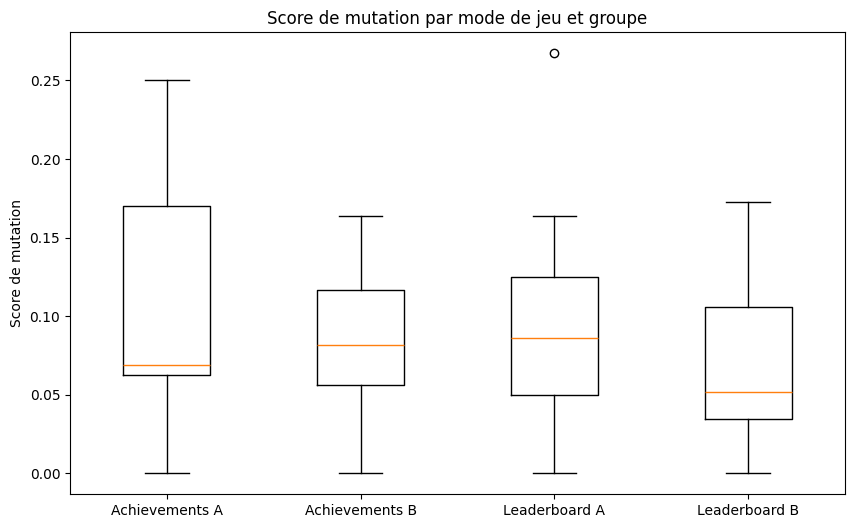

In [113]:
plt.figure(figsize=(10, 6))
plt.boxplot([
    project_data_df[(project_data_df['game_mode'] == 'achievements') & (project_data_df['group'] == 'A')]['mutation_coverage'],
    project_data_df[(project_data_df['game_mode'] == 'achievements') & (project_data_df['group'] == 'B')]['mutation_coverage'],
    project_data_df[(project_data_df['game_mode'] == 'leaderboard') & (project_data_df['group'] == 'A')]['mutation_coverage'],
    project_data_df[(project_data_df['game_mode'] == 'leaderboard') & (project_data_df['group'] == 'B')]['mutation_coverage']
], tick_labels=['Achievements A', 'Achievements B', 'Leaderboard A', 'Leaderboard B'])

plt.title('Score de mutation par mode de jeu et groupe')
plt.ylabel('Score de mutation')
plt.show()